In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from datetime import datetime as dt
from itertools import compress
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# Data for deaths
deaths = pd.read_csv('data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_US = pd.read_csv('data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

# Extra case data, unlikely to be used since it is very dependent on policy
confirmed_cases = pd.read_csv('data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_US = pd.read_csv('data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
recovered = pd.read_csv('data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
deaths.rename(columns = {'Province/State': 'Province', 'Country/Region': 'Country'}, inplace = True)
deaths

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,18,21,23,25,30,30,30,33,36,36
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,23,23,24,25,26,26,26,26,26,26
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,293,313,326,336,348,364,367,375,384,392
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,29,29,31,33,33,35,35,36,37,37
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
deaths['region'] = deaths.apply(lambda x: str(x.Province) + ', ' + str(x.Country) if not pd.isna(x.Province) else x.Country, axis = 1)
deaths = deaths.drop(['Province','Country','Lat','Long'],axis=1)
deaths = deaths.set_index('region')
threshold = 100

In [5]:
country = "Poland"
dates = deaths.loc[country].keys()
dates = [dt.strptime(date, '%m/%d/%y').date() for date in dates]
deaths_data = deaths.loc[country].values


dates = list(compress(dates, deaths_data>=threshold))
deaths_data = deaths_data[deaths_data>=threshold]

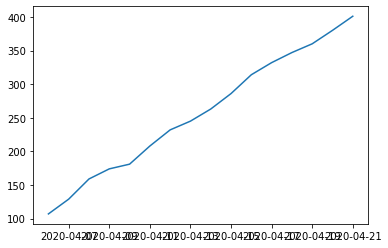

In [6]:
plt.plot(dates, deaths_data)

In [7]:
model = ARIMA(deaths_data, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   16
Model:                     ARMA(1, 0)   Log Likelihood                 -72.965
Method:                       css-mle   S.D. of innovations             20.519
Date:                Wed, 22 Apr 2020   AIC                            151.930
Time:                        16:05:02   BIC                            154.247
Sample:                             0   HQIC                           152.048
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        254.2773    134.559      1.890      0.059      -9.454     518.008
ar.L1.y        0.9892      0.015     64.245      0.000       0.959       1.019
                                    Roots           

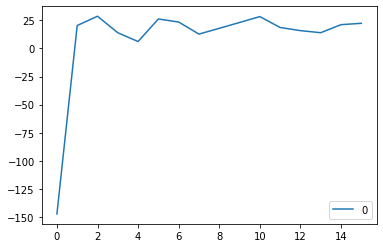

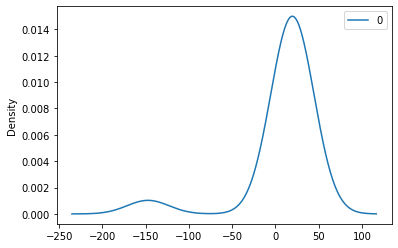

                0
count   16.000000
mean     9.104532
std     42.138409
min   -147.277266
25%     13.994234
50%     19.526795
75%     23.195658
max     28.645831


In [8]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())